https://www.kaggle.com/datasets/syuzai/perth-house-prices

 **Previsão de Preços de Casas em Perth Austrália**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")


In [ ]:
dados = pd.read_csv('/content/all_perth_310121.csv')
dados.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [ ]:
dados.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,3.365600e+04,33656.000000,33656.000000,31178.000000,33656.000000,33656.000000,30501.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,22704.000000
mean,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436,19777.374465,4523.371494,6089.420074,-31.960664,115.879265,1.815268,72.672569
std,3.558256e+05,0.752038,0.587427,1.365225,16693.513215,72.102982,20.964330,11364.415413,4495.064024,62.167921,0.177780,0.118137,1.746000,40.639795
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912,1.000000
25%,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1978.000000,11200.000000,1800.000000,6050.000000,-32.068437,115.789763,0.880568,39.000000
50%,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1995.000000,17500.000000,3200.000000,6069.000000,-31.933231,115.854198,1.345520,68.000000
75%,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2005.000000,26600.000000,5300.000000,6150.000000,-31.843818,115.970722,2.097225,105.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.457450,116.343201,23.254372,139.000000


# Análises iniciais

In [ ]:
dados.shape

(33656, 19)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [ ]:
#Verifica se ha linhas duplicadas
dados.duplicated().sum()

0

In [ ]:
dados.POSTCODE.nunique()

114

In [ ]:
dados.NEAREST_SCH.nunique()

160

In [ ]:
dados.NEAREST_STN.nunique()

68

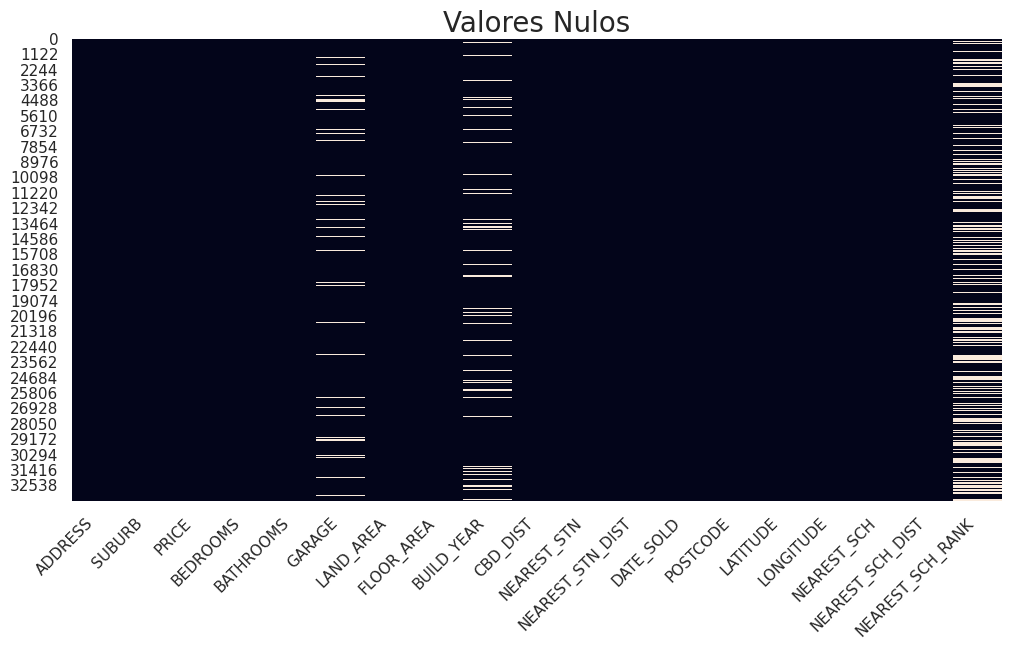

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dados.isnull(), cbar=False)
plt.title("Valores Nulos",fontsize=20)
plt.xticks(ha="right",rotation=45);


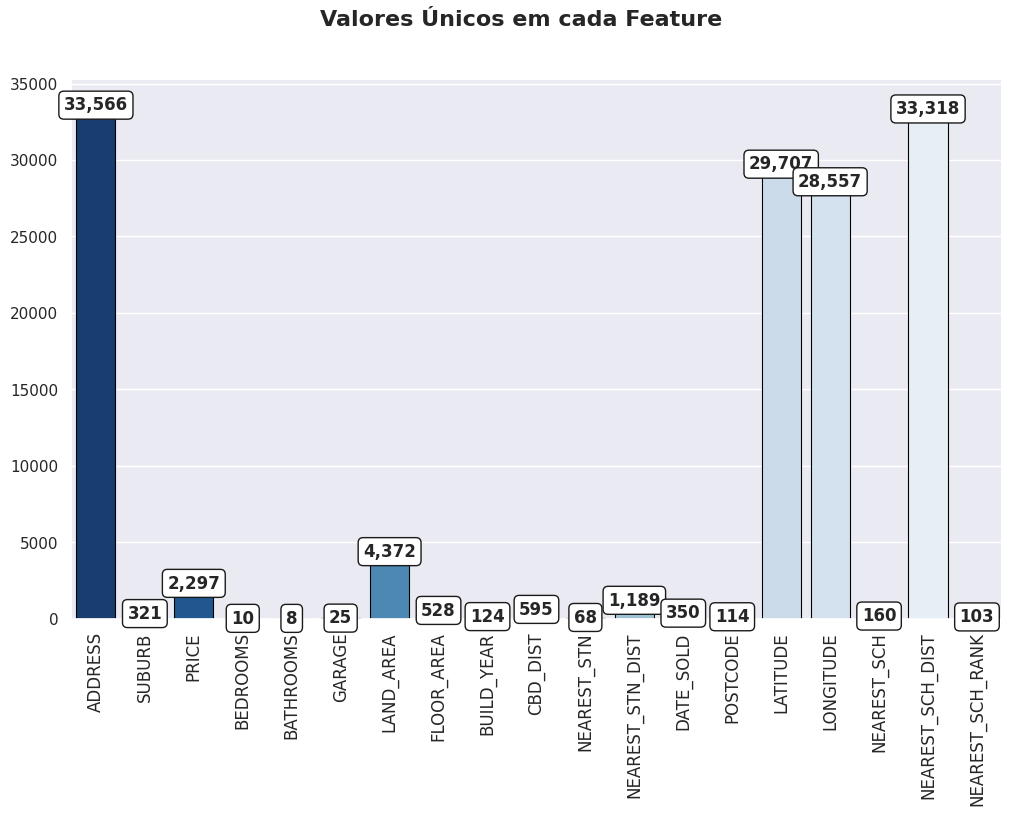

In [ ]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=dados.columns, y=dados.nunique().values, 
            palette='Blues_r', linewidth=0.8, edgecolor='black')
plt.xticks(rotation=90, fontsize=12)

for p in ax.patches:
    value = f"{p.get_height():,.0f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 20
    ax.text(x, y, value, fontsize=12, ha='center', va='center', weight='bold',
           bbox=dict(facecolor='white', boxstyle='round', linewidth=1, edgecolor='k'))
plt.suptitle(t = 'Valores Únicos em cada Feature', fontsize = 16, weight = 'bold') 
sns.despine()
plt.show()

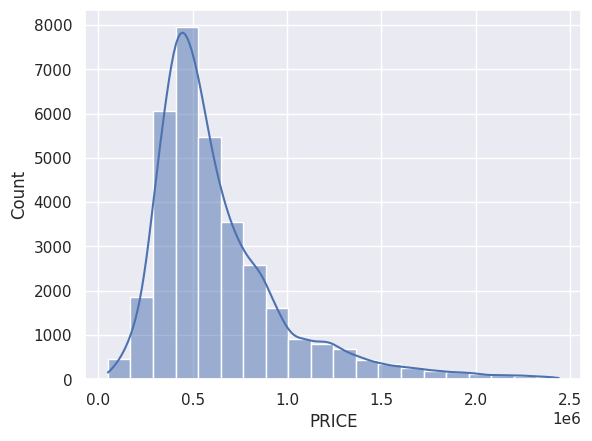

In [ ]:
sns.histplot(data =dados , x="PRICE", bins = 20, kde = True);

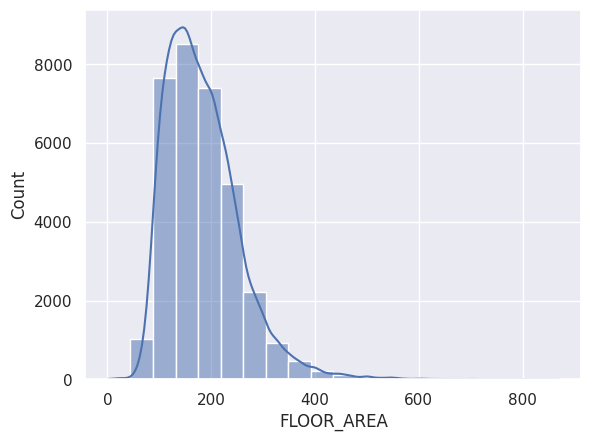

In [ ]:
sns.histplot(data=dados, x="FLOOR_AREA", bins = 20, kde = True);

In [ ]:
columns = dados.drop(["SUBURB" ,"ADDRESS", "POSTCODE", "NEAREST_SCH_RANK", "DATE_SOLD", "NEAREST_STN", "NEAREST_SCH", "BUILD_YEAR"], axis=1)

columns.shape

(33656, 11)

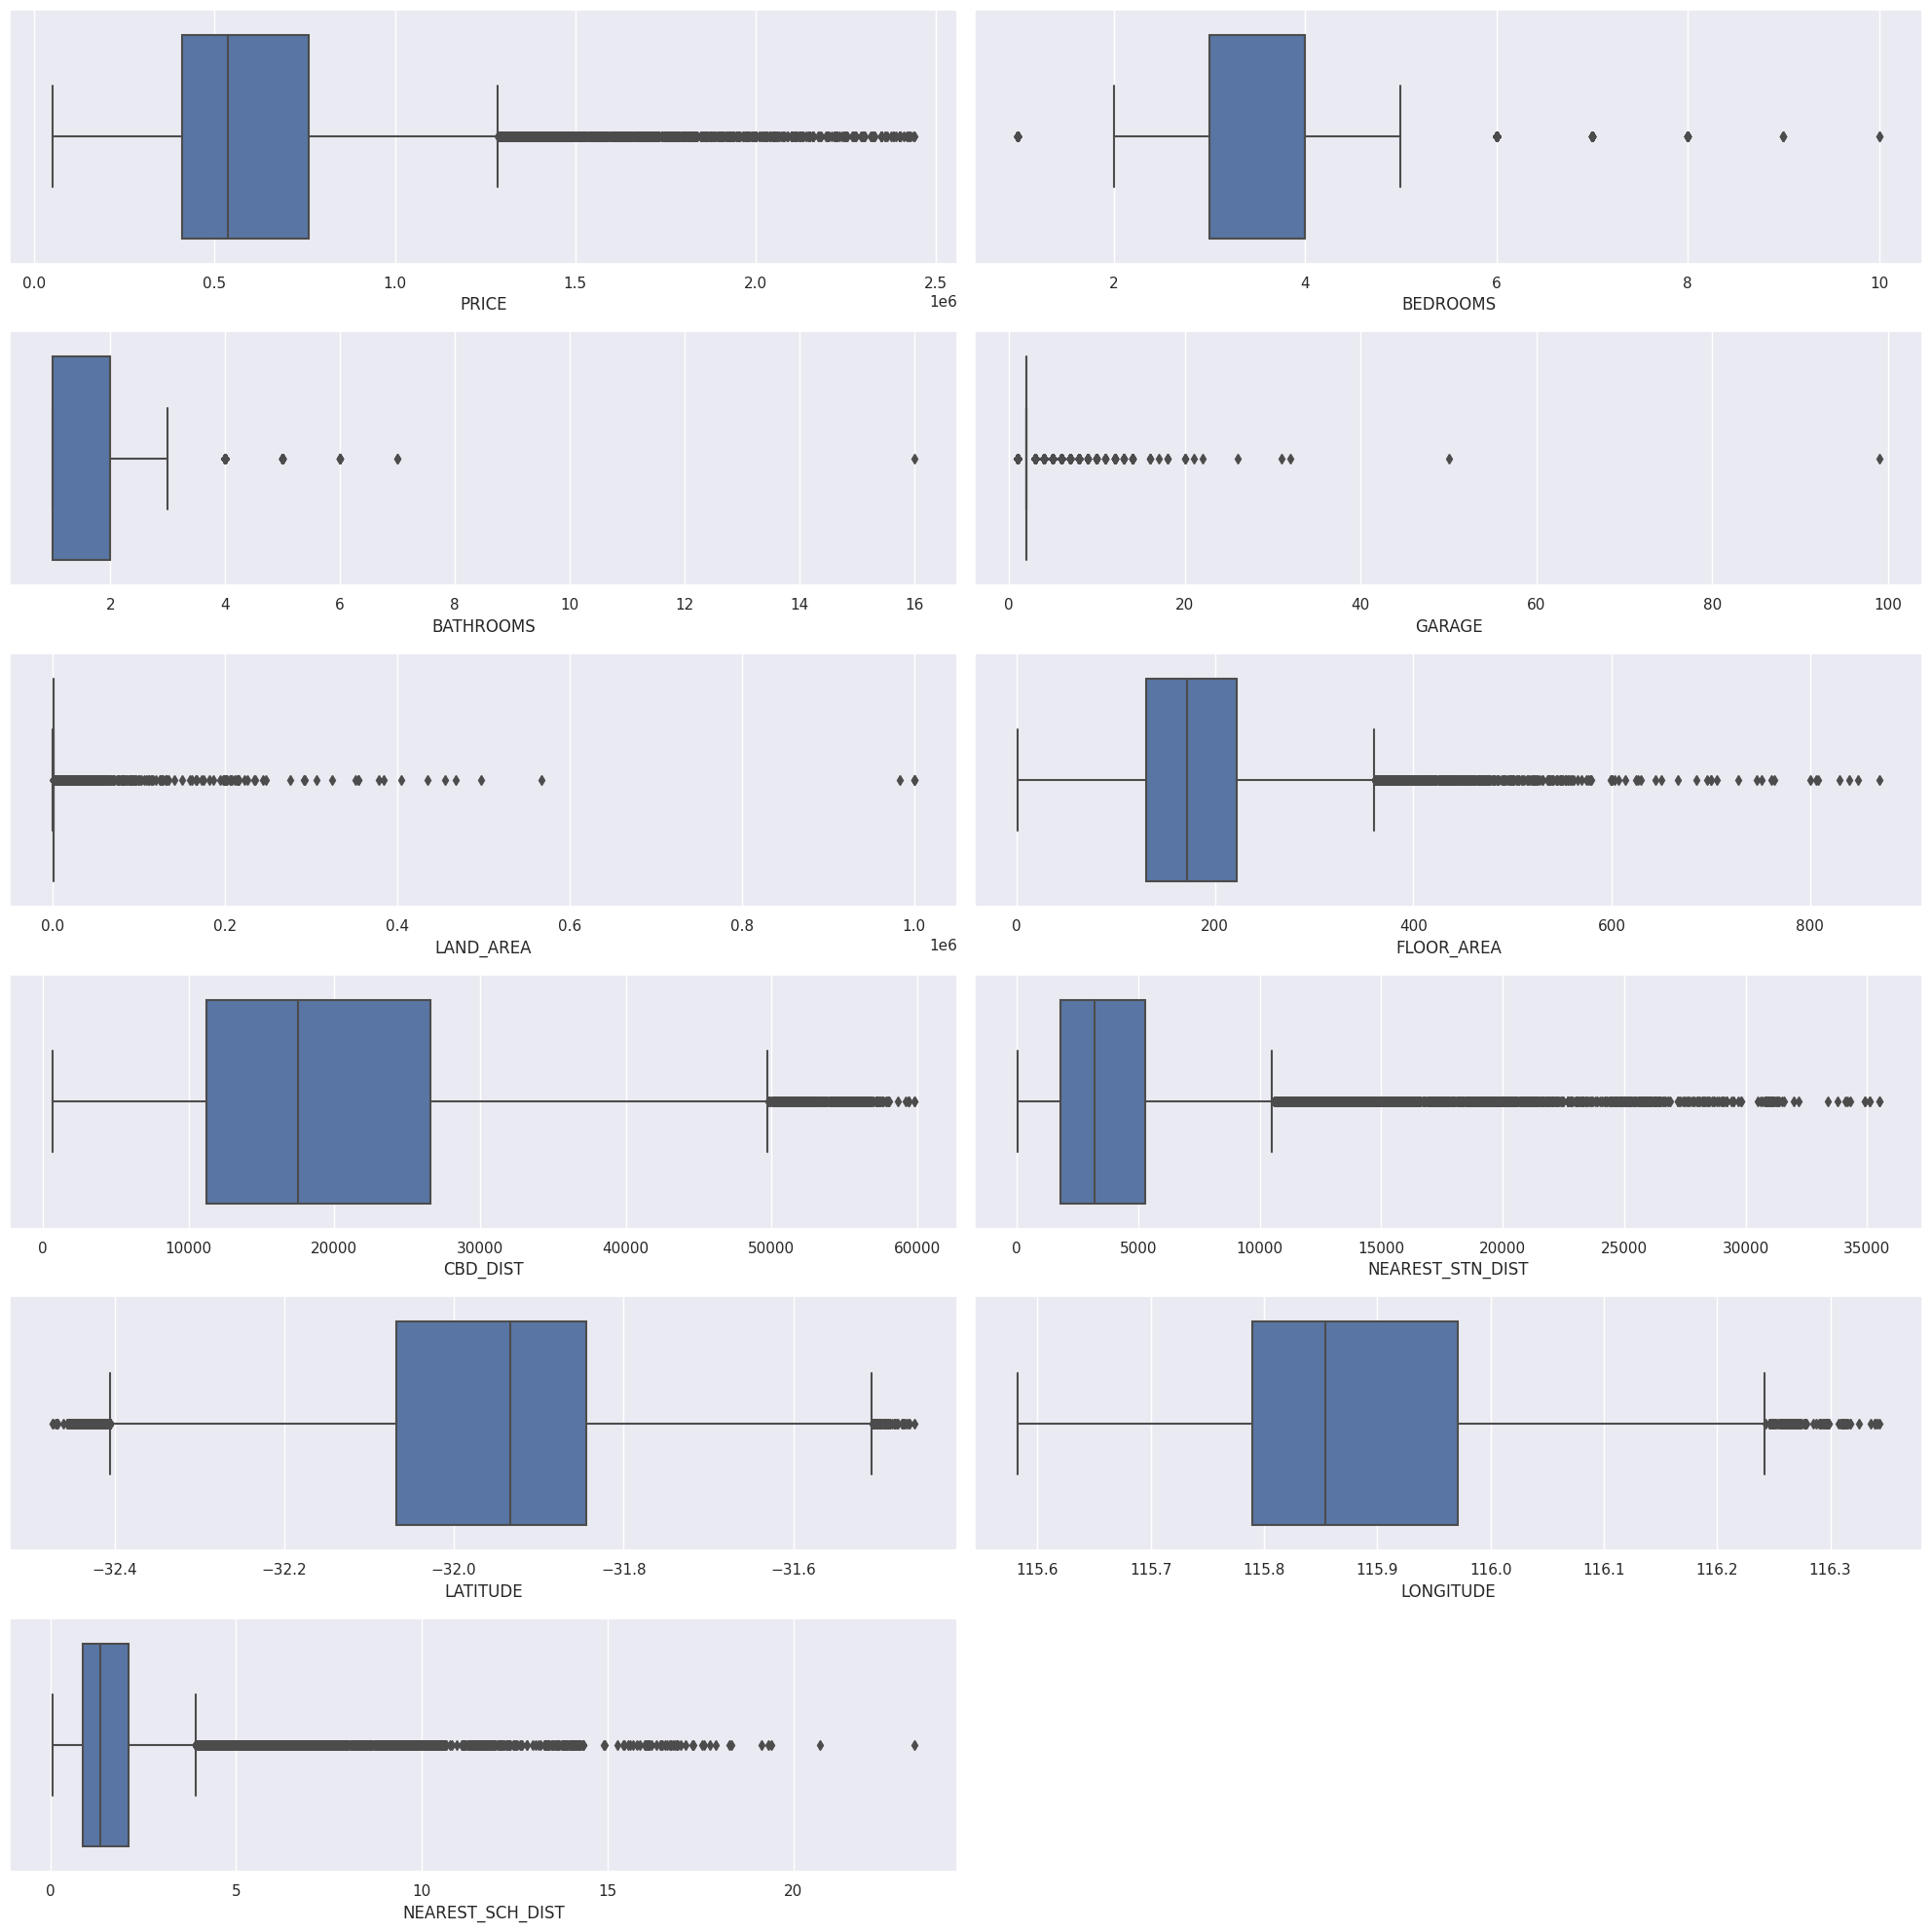

In [ ]:
plt.figure(figsize=(20,20))
for x,y in enumerate(columns):
  plt.subplot(6,2,x+1)
  sns.boxplot(data=dados, x=y)
plt.tight_layout();

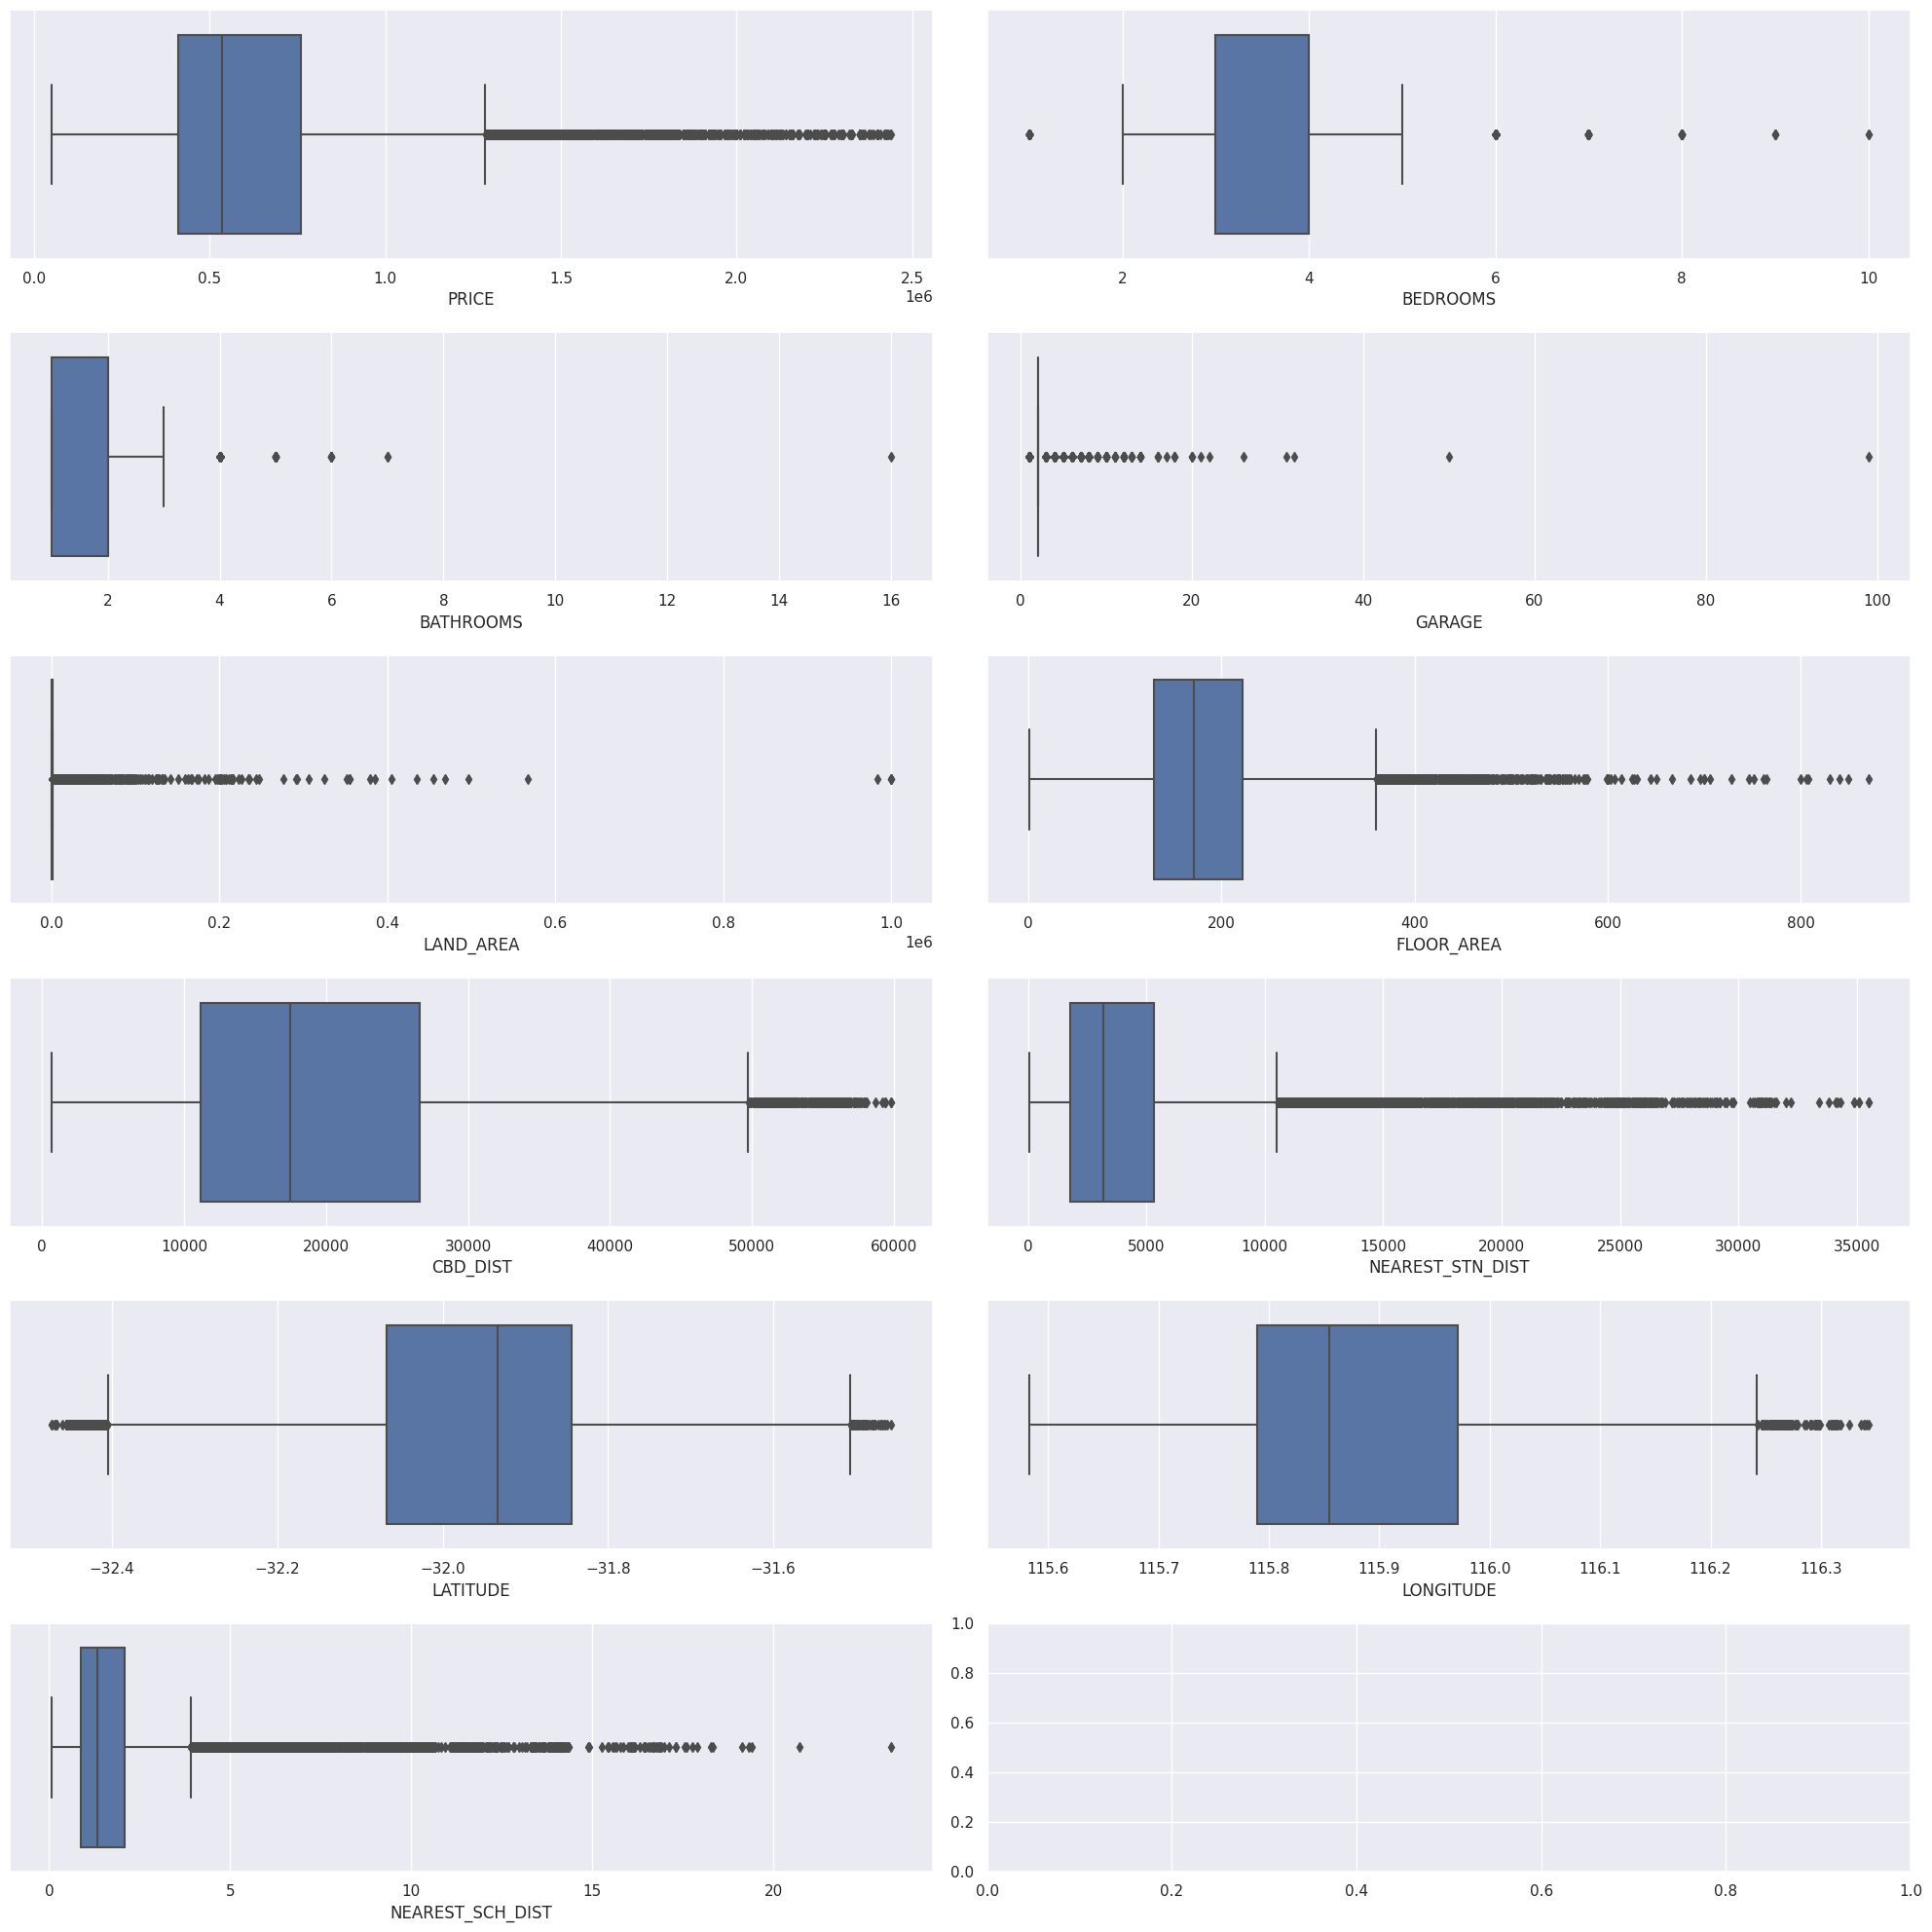

In [ ]:
# Novo
# Gráfico Boxplot
var = dados.columns
var = dados.drop(["SUBURB" ,"ADDRESS", "POSTCODE", "NEAREST_SCH_RANK", "DATE_SOLD", "NEAREST_STN", "NEAREST_SCH", "BUILD_YEAR"], axis=1)

fig, ax = plt.subplots(ncols = 2,nrows = 6, figsize=(20,20))
index = 0
ax = ax.flatten()

for col in var:
    sns.boxplot(x=col, data = dados,  ax=ax[index] )
    index +=1
plt.tight_layout();

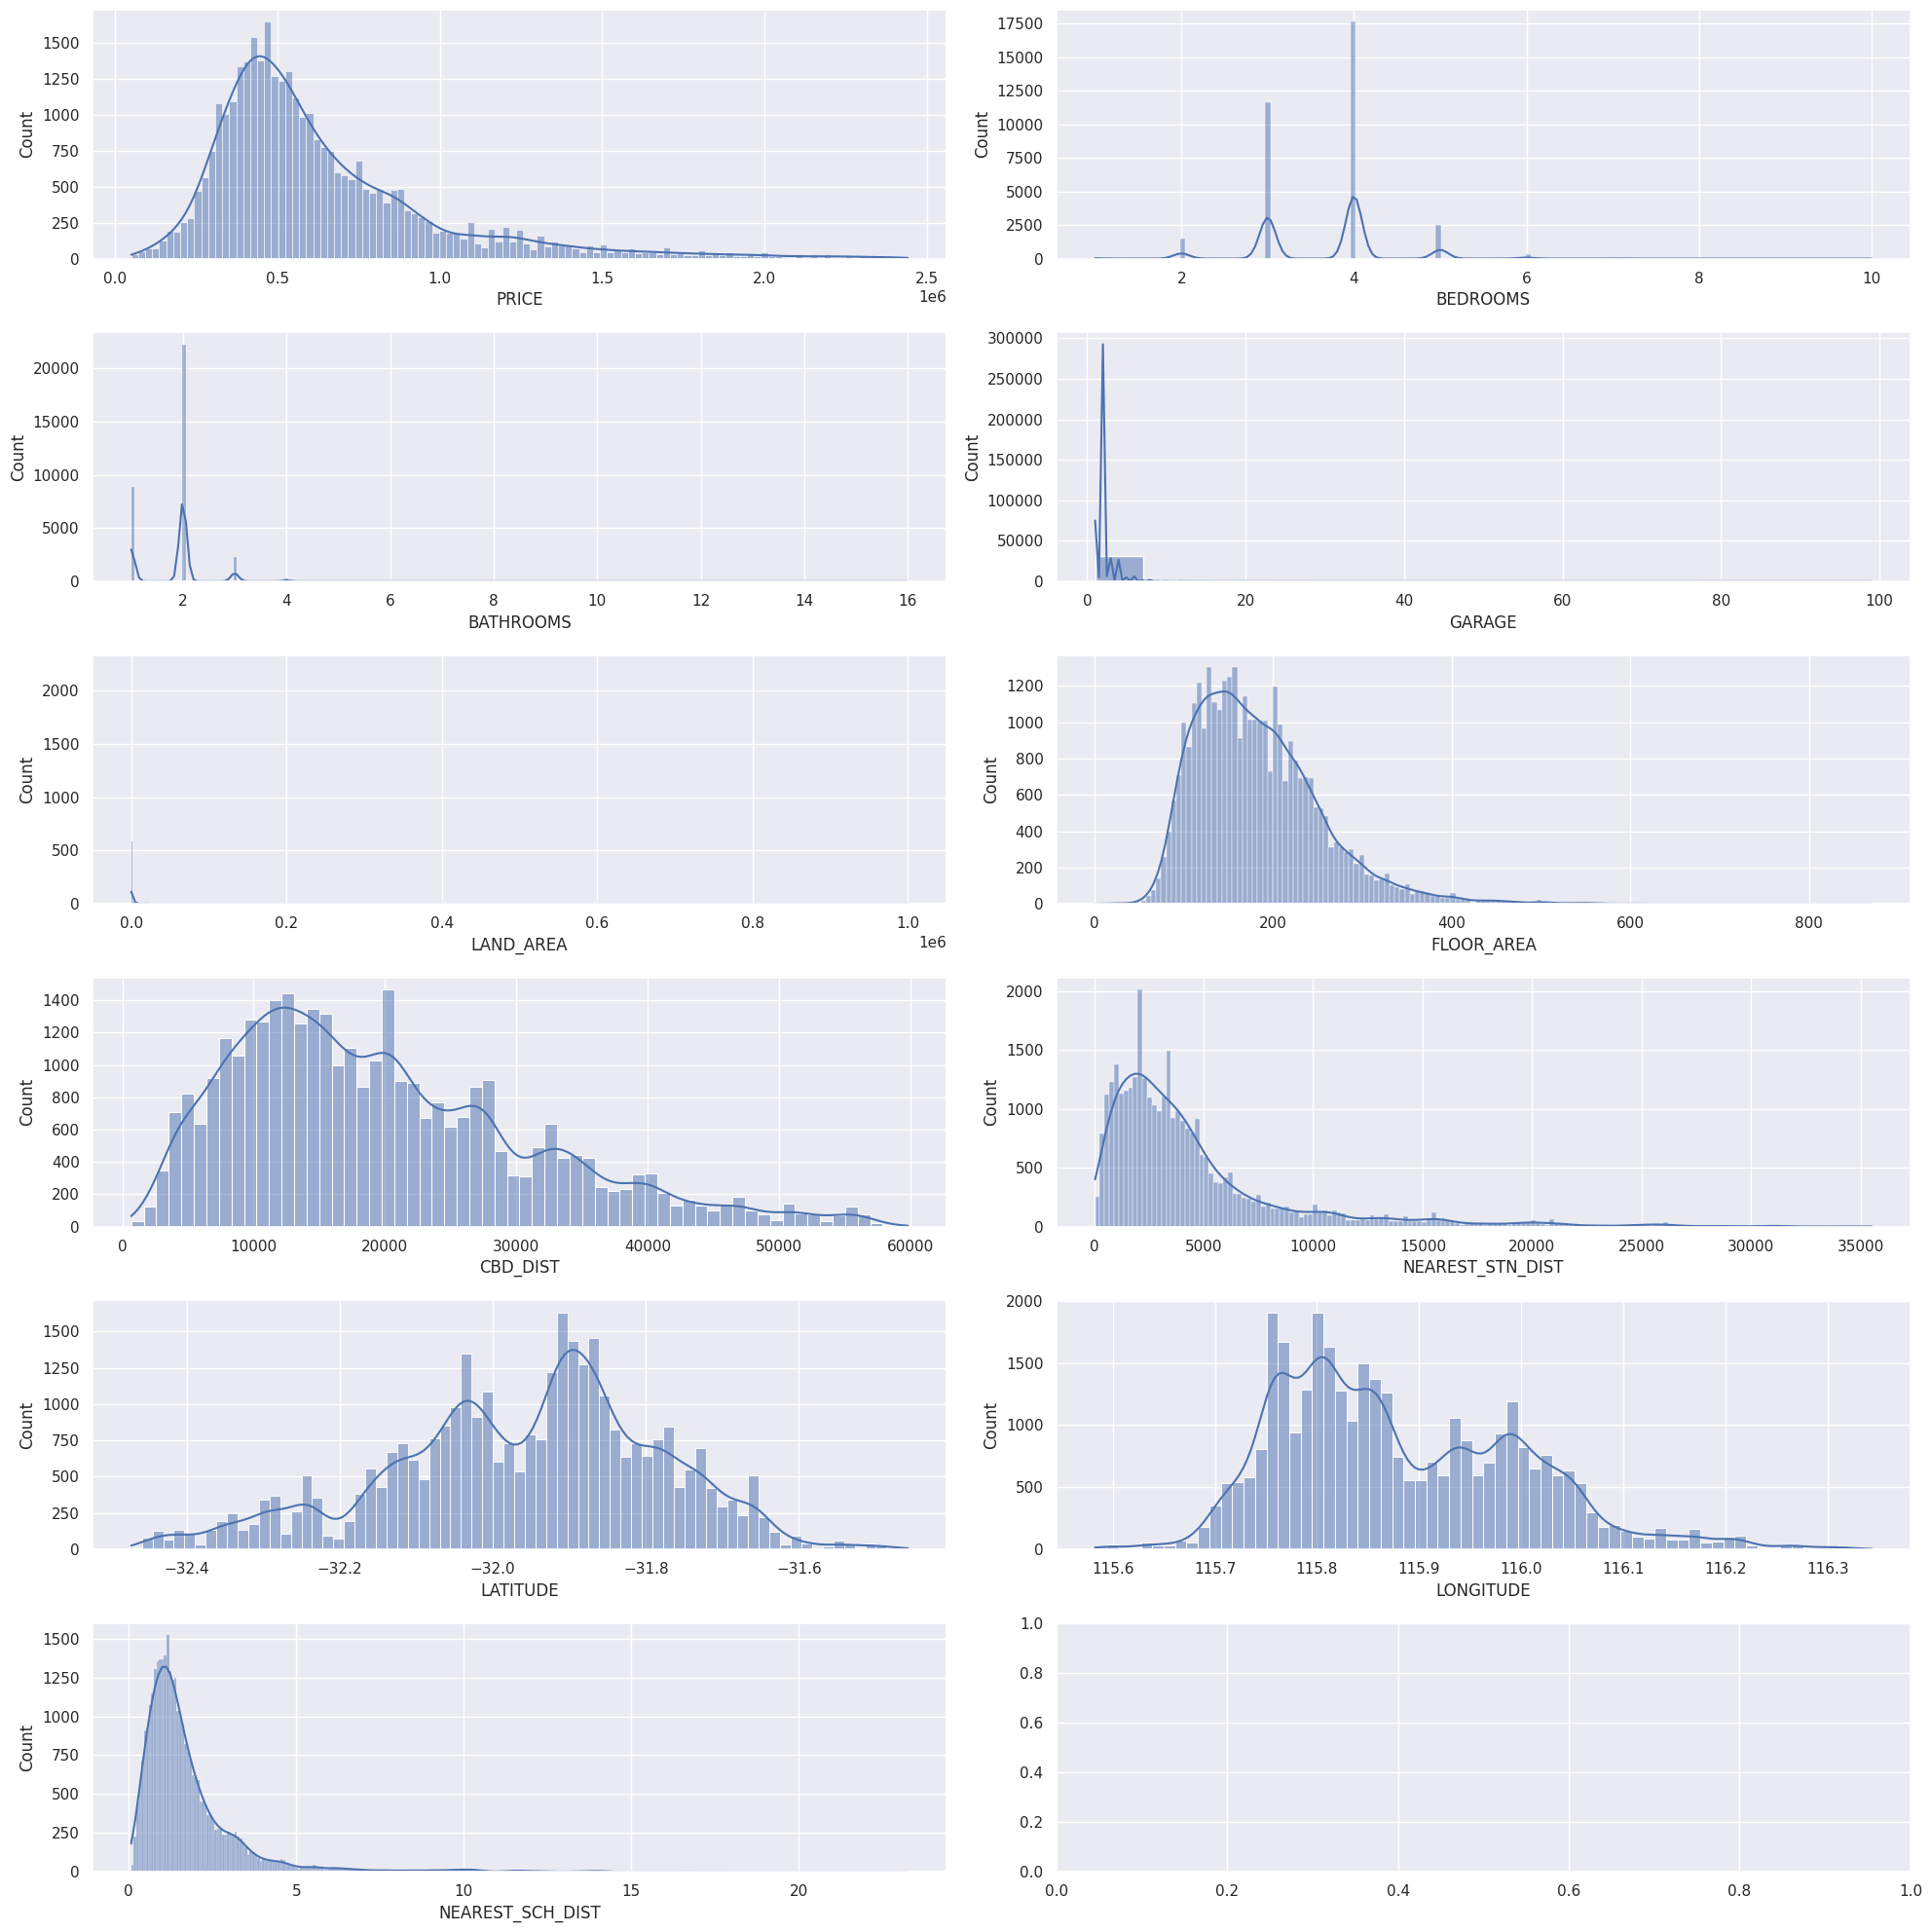

In [ ]:
# Gráfico Histograma
var = dados.columns
var = dados.drop(["SUBURB" ,"ADDRESS", "POSTCODE", "NEAREST_SCH_RANK", "DATE_SOLD", "NEAREST_STN", "NEAREST_SCH", "BUILD_YEAR"], axis=1)

fig, ax = plt.subplots(ncols = 2,nrows = 6, figsize=(20,20))
index = 0
ax = ax.flatten()

for col in var:
    sns.histplot(x=col, data = dados,  ax=ax[index], kde=True )
    index +=1
plt.tight_layout();

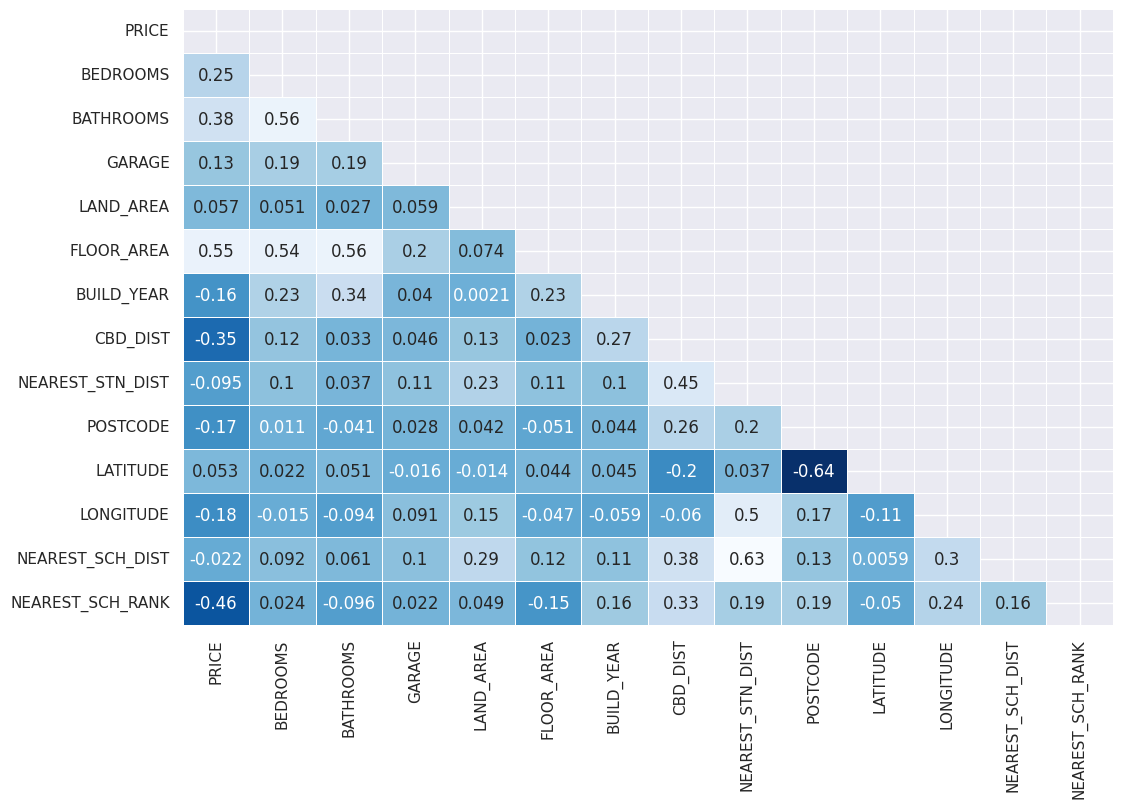

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dados.corr(),  cbar=False, mask=np.triu(dados.corr()), annot=True,linewidth=0.7, linecolor='white', cmap = 'Blues_r');

# Analytics

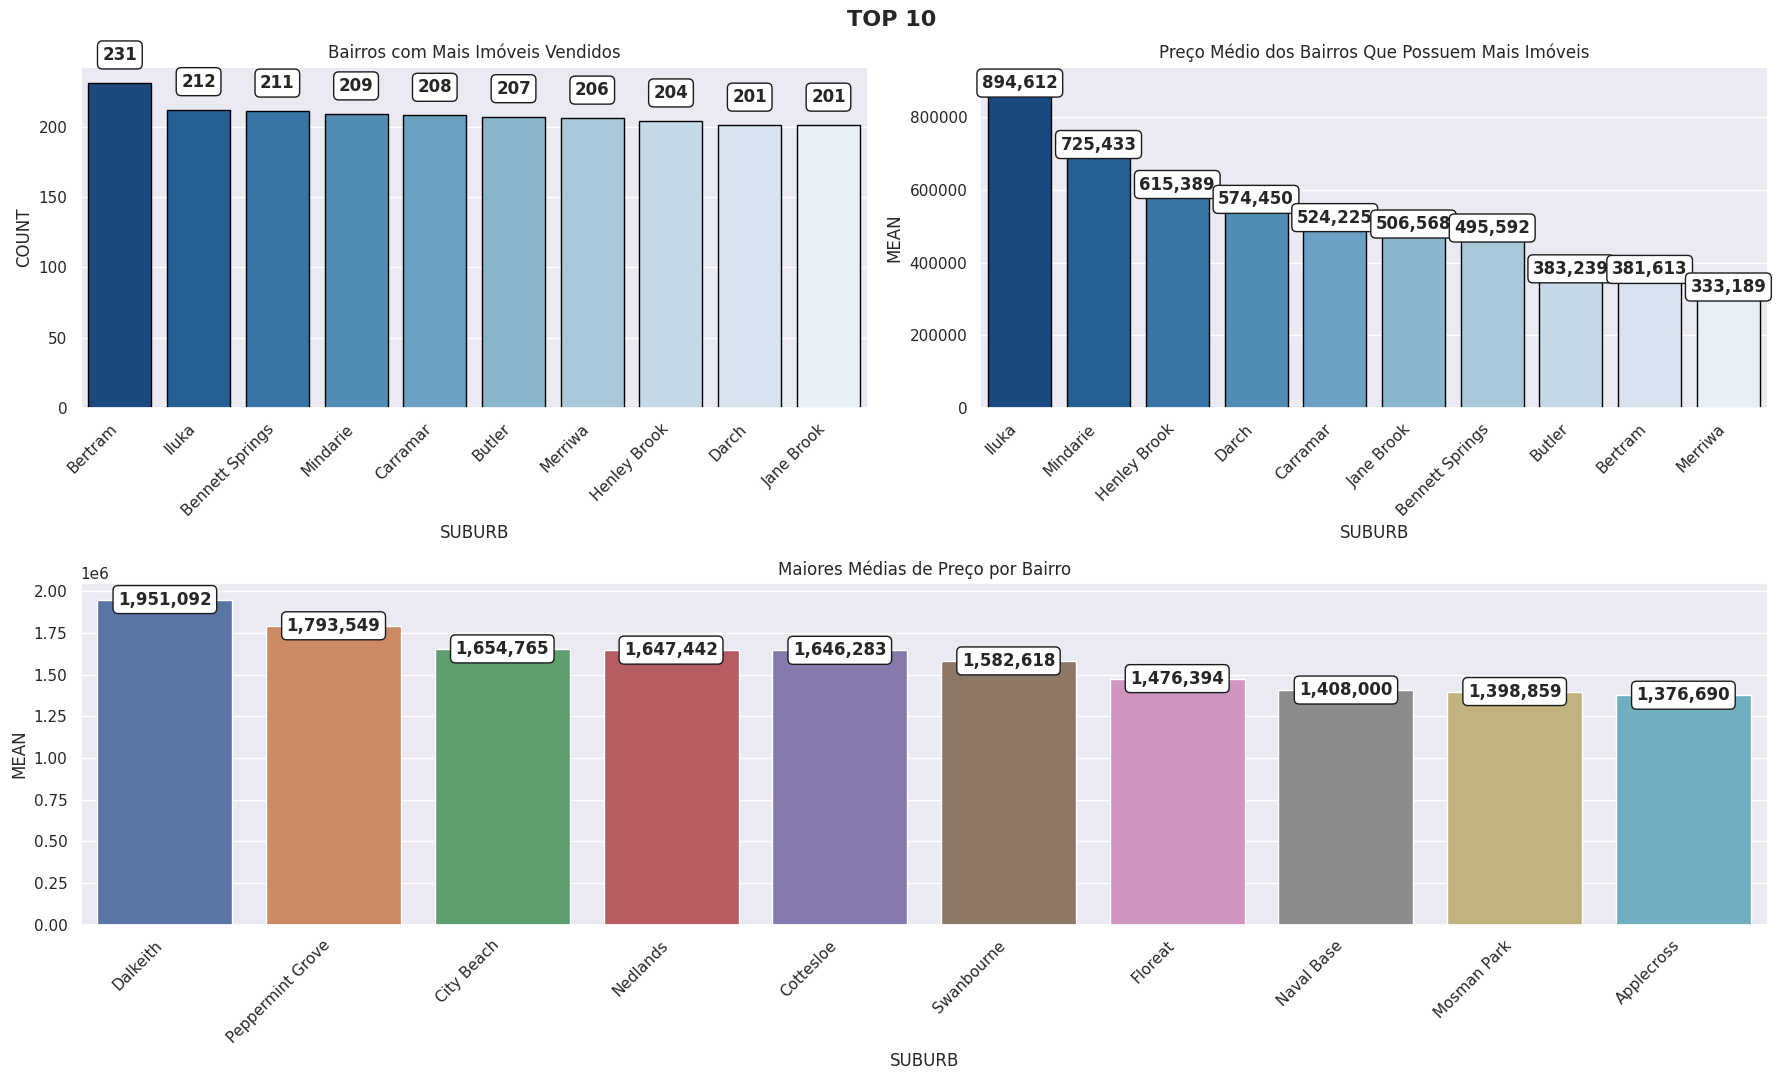

In [ ]:

plt.figure(figsize=(18,11))

# Primeiro Gráfico
plt.subplot(2,2,1)
TOP10_suburban = dados.groupby("SUBURB")["SUBURB"].count().sort_values(ascending=False).head(10)
TOP10_suburban.index
TOP10_suburban.values
x = pd.DataFrame(TOP10_suburban.values, index = TOP10_suburban.index, columns = ["COUNT"])


ax=sns.barplot(data = x, x=x.index, y=x.COUNT,linewidth=1.0, edgecolor='black', palette='Blues_r')
plt.xticks(rotation=45, ha = "right")
plt.title("Bairros com Mais Imóveis Vendidos");


for p in ax.patches:
    value = f"{p.get_height():,.0f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 20
    ax.text(x, y, value, fontsize=12, ha='center', va='center', weight='bold',
           bbox=dict(facecolor='white', boxstyle='round', linewidth=1, edgecolor='k'))
plt.suptitle(t = "TOP 10", fontsize = 16, weight = 'bold') ;



# Segundo Gráfico
plt.subplot(2,2,2)
tt = dados.loc[dados['SUBURB'].isin(TOP10_suburban.index),:]
tt_meam = tt.groupby('SUBURB')['PRICE'].mean().sort_values(ascending=False)
y = pd.DataFrame(tt_meam.values, index = tt_meam.index, columns = ["MEAN"])


ax2=sns.barplot(data = y, x=y.index, y=y.MEAN,linewidth=1.0, edgecolor='black', palette='Blues_r')
plt.xticks(rotation=45, ha = "right")
plt.title("Preço Médio dos Bairros Que Possuem Mais Imóveis");


for p in ax2.patches:
    value = f"{p.get_height():,.0f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 20
    ax2.text(x, y, value, fontsize=12, ha='center', va='center', weight='bold',
           bbox=dict(facecolor='white', boxstyle='round', linewidth=1, edgecolor='k'));


# Terceiro Gráfico
plt.subplot(2,2,(3,4))
TOP10_MeanPrices = dados.groupby("SUBURB")["PRICE"].mean().sort_values(ascending=False).head(10)
TOP10_MeanPrices.index
TOP10_MeanPrices.values
k = pd.DataFrame(TOP10_MeanPrices.values, index = TOP10_MeanPrices.index, columns = ["MEAN"])


ax3 = sns.barplot(data = k, x=k.index, y=k.MEAN, linewidth=1.0)
plt.xticks(rotation=45, ha = "right")
plt.title("Maiores Médias de Preço por Bairro")

for p in ax3.patches:
    value = f"{p.get_height():,.0f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 20
    ax3.text(x, y, value, fontsize=12, ha='center', va='center', weight='bold',
           bbox=dict(facecolor='white', boxstyle='round', linewidth=1, edgecolor='k')) ;

plt.tight_layout()

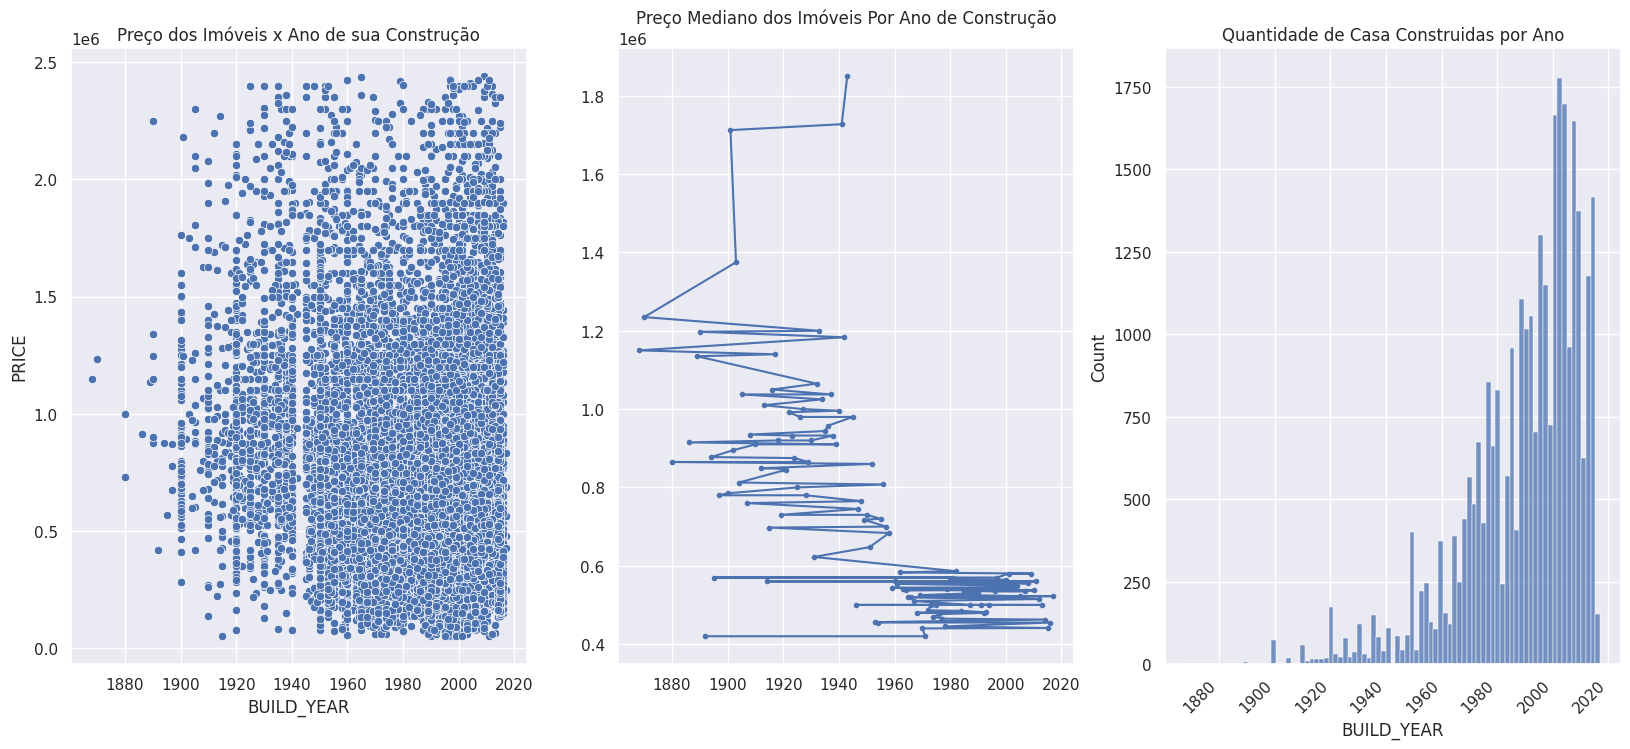

In [ ]:
#t_b_y = dados[dados['PRICE']>1000000].groupby("BUILD_YEAR")['PRICE'].mean().sort_values(ascending=False)
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.scatterplot(x= dados.BUILD_YEAR,y=dados.PRICE,data=dados);
plt.title("Preço dos Imóveis x Ano de sua Construção")

plt.subplot(1,3,2)
t_b_y = dados.groupby("BUILD_YEAR")['PRICE'].median().sort_values(ascending=False)
# type(t_b_y) retorna uma series
plt.title("Preço Mediano dos Imóveis Por Ano de Construção")
plt.plot( t_b_y.index, t_b_y.values,marker = 'o', ms = 3, );

plt.subplot(1,3,3)
plt.title("Quantidade de Casa Construidas por Ano")
sns.histplot(data=dados, x=dados['BUILD_YEAR']);
plt.xticks(rotation=45, ha = "right");

Analisando o segundo gráfico é possivel notar as casas mais antigas possuem a mediana dos preços maior que as das casas mais novas.

In [ ]:
fig = px.scatter(dados, x=dados.BUILD_YEAR, y=dados.PRICE, color=dados.PRICE )
fig.show()

In [ ]:
dados['DATE_SOLD'].replace('\r','',regex=True, inplace = True)
dados['DATE_SOLD'] = pd.to_datetime(dados['DATE_SOLD'], format='%m-%Y')

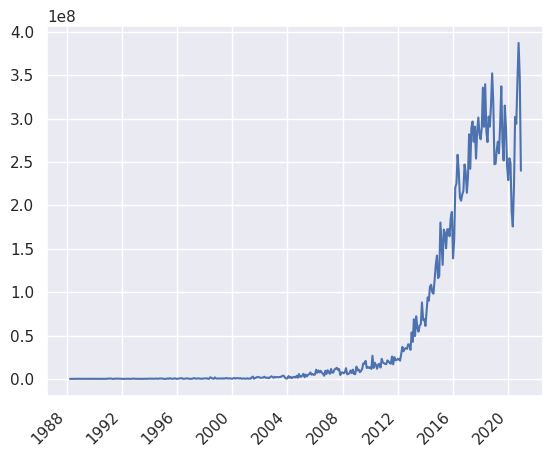

In [ ]:
data_valor = dados.groupby('DATE_SOLD')['PRICE'].sum()
plt.plot(data_valor.index, data_valor.values)
plt.xticks(rotation=45, ha = "right");

A partir do ano de 2012 Houve um "boom" no faturamento de venda de casas em Perth

# Removendo Outlier e valores Nulos

In [ ]:
dados["GARAGE"].fillna(0, inplace = True)

In [ ]:
index_remove = dados[dados['LAND_AREA']>800000].index
dados.drop(index_remove, axis=0, inplace=True )

In [ ]:
index_remove_Garage =dados[dados["GARAGE"]>20].index
dados.drop(index_remove_Garage, axis=0, inplace = True)

In [ ]:
index_nearest = dados[dados.NEAREST_SCH_RANK.isnull()].index
index_nearest

Int64Index([    0,     3,     4,     5,     6,     7,     8,    10,    12,
               14,
            ...
            33596, 33597, 33602, 33610, 33624, 33629, 33630, 33642, 33647,
            33654],
           dtype='int64', length=10950)

In [ ]:
dados.drop(index_nearest, axis = 0, inplace = True)
dados.reset_index(inplace=True, drop=True)

In [ ]:
index_BUILD_YEAR = dados[dados.BUILD_YEAR.isnull()].index
dados.drop(index_BUILD_YEAR, axis = 0, inplace = True)
dados.reset_index(inplace=True, drop=True)

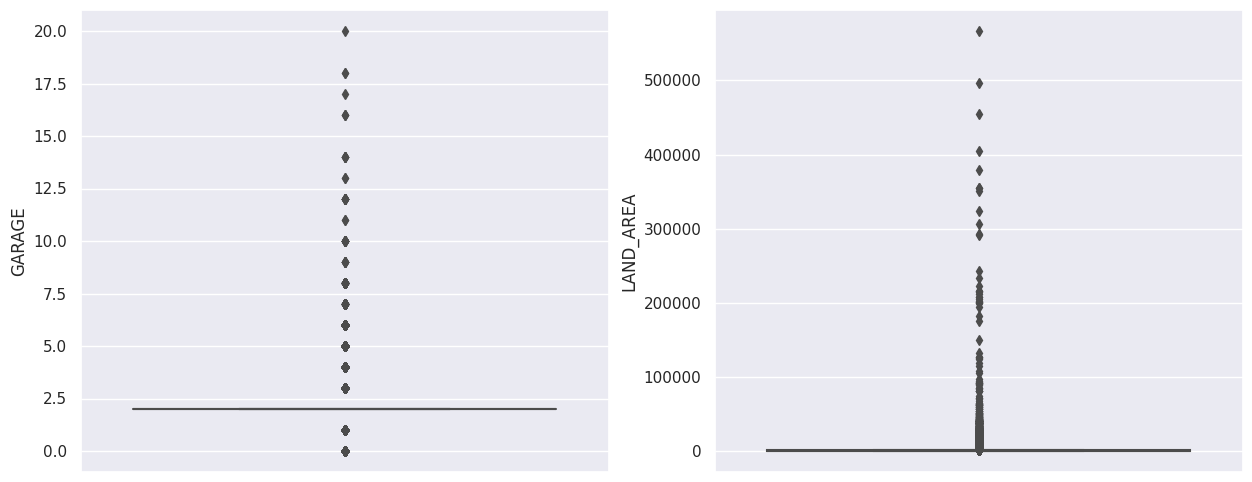

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dados.GARAGE)
plt.subplot(1,2,2)
sns.boxplot(y=dados.LAND_AREA)
plt.tight_layout;

In [ ]:
dados.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
1,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
2,1 Arundel Street,Bayswater,685000,3,2,8.0,552,126,1999.0,5900,Bayswater Station,508,10-2019\r,6053,-31.917880,115.907050,CHISHOLM CATHOLIC COLLEGE,0.936243,29.0
3,1 Ashcott Gate,Butler,367500,3,2,2.0,398,158,2003.0,36300,Butler Station,2100,11-2018\r,6036,-31.654280,115.702200,BUTLER COLLEGE,0.680843,39.0
4,1 Ashendon Boulevard,Hammond Park,535000,4,2,4.0,704,247,2002.0,23100,Cockburn Central Station,3900,07-2019\r,6164,-32.159590,115.849480,ATWELL COLLEGE,2.220643,129.0


# Removendo Colunas

In [ ]:
dados.drop(["ADDRESS", "POSTCODE",  "DATE_SOLD", "NEAREST_STN", "NEAREST_SCH"], axis=1, inplace=True)


In [ ]:
dados = dados.reindex(columns = ["SUBURB",	"BEDROOMS",	"BATHROOMS",	"GARAGE",	"LAND_AREA",	"FLOOR_AREA", "CBD_DIST",	"NEAREST_STN_DIST",	"LONGITUDE", "LATITUDE","BUILD_YEAR","NEAREST_SCH_RANK","PRICE"])


In [ ]:
dados.head()

,SUBURB,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,CBD_DIST,NEAREST_STN_DIST,LONGITUDE,LATITUDE,BUILD_YEAR,NEAREST_SCH_RANK,PRICE
0,Wandi,3,2,2.0,351,139,26900,4900,115.859554,-32.193470,2013.0,129.0,365000
1,Camillo,3,1,1.0,719,86,22600,1900,115.993579,-32.120578,1979.0,113.0,287000
2,Bayswater,3,2,8.0,552,126,5900,508,115.907050,-31.917880,1999.0,29.0,685000
3,Butler,3,2,2.0,398,158,36300,2100,115.702200,-31.654280,2003.0,39.0,367500
4,Hammond Park,4,2,4.0,704,247,23100,3900,115.849480,-32.159590,2002.0,129.0,535000


In [ ]:
dados.shape

(20683, 13)

In [ ]:
dados.isnull().sum()

SUBURB              0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
CBD_DIST            0
NEAREST_STN_DIST    0
LONGITUDE           0
LATITUDE            0
BUILD_YEAR          0
NEAREST_SCH_RANK    0
PRICE               0
dtype: int64

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20683 entries, 0 to 20682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBURB            20683 non-null  object 
 1   BEDROOMS          20683 non-null  int64  
 2   BATHROOMS         20683 non-null  int64  
 3   GARAGE            20683 non-null  float64
 4   LAND_AREA         20683 non-null  int64  
 5   FLOOR_AREA        20683 non-null  int64  
 6   CBD_DIST          20683 non-null  int64  
 7   NEAREST_STN_DIST  20683 non-null  int64  
 8   LONGITUDE         20683 non-null  float64
 9   LATITUDE          20683 non-null  float64
 10  BUILD_YEAR        20683 non-null  float64
 11  NEAREST_SCH_RANK  20683 non-null  float64
 12  PRICE             20683 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 2.1+ MB


# Previsor: Utilizando LabelEncoder na Coluna SUBURB e Padronização nos Preditores

## LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
previsores2 = dados.iloc[:, 0:13].values

In [ ]:
previsores2[:, 0] = LabelEncoder().fit_transform(previsores2[:, 0] )


In [ ]:
previsores2

array([[253, 3, 2, ..., 2013.0, 129.0, 365000],
       [44, 3, 1, ..., 1979.0, 113.0, 287000],
       [21, 3, 2, ..., 1999.0, 29.0, 685000],
       ...,
       [170, 4, 2, ..., 2014.0, 53.0, 467000],
       [232, 3, 2, ..., 1997.0, 128.0, 955000],
       [232, 4, 3, ..., 2013.0, 49.0, 1040000]], dtype=object)

## Padronização

In [ ]:
x = previsores2[:, 0:12]
y2 = previsores2[:, 12]

In [ ]:
x

array([[253, 3, 2, ..., -32.19347028, 2013.0, 129.0],
       [44, 3, 1, ..., -32.12057813, 1979.0, 113.0],
       [21, 3, 2, ..., -31.91788, 1999.0, 29.0],
       ...,
       [170, 4, 2, ..., -31.87219187, 2014.0, 53.0],
       [232, 3, 2, ..., -32.06641, 1997.0, 128.0],
       [232, 4, 3, ..., -32.06458, 2013.0, 49.0]], dtype=object)

In [ ]:
y2 = y2.astype(np.float)

In [ ]:
y2

array([ 365000.,  287000.,  685000., ...,  467000.,  955000., 1040000.])

In [ ]:
from sklearn.preprocessing import StandardScaler
X_esc2 = StandardScaler().fit_transform(x)

In [ ]:
X_esc2, X_esc2.dtype

(array([[ 1.54015557, -0.86771749,  0.26578301, ..., -1.45080949,
          1.09854999,  1.39346968],
        [-1.13829022, -0.86771749, -1.41634367, ..., -1.01693954,
         -0.43610636,  0.99998025],
        [-1.43304741, -0.86771749,  0.26578301, ...,  0.18956389,
          0.46663267, -1.06583926],
        ...,
        [ 0.47646658,  0.448431  ,  0.26578301, ...,  0.4615096 ,
          1.14368694, -0.47560512],
        [ 1.27102944, -0.86771749,  0.26578301, ..., -0.69451902,
          0.37635877,  1.36887659],
        [ 1.27102944,  0.448431  ,  1.94790969, ..., -0.68362647,
          1.09854999, -0.57397748]]),
 dtype('float64'))

## Separação dos dados em Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split

X_treino2, X_teste2, y_treino2, y_teste2 = train_test_split(X_esc2, y2, test_size=0.2, random_state=0)

X_treino2.shape, y_treino2.shape, X_teste2.shape, y_teste2.shape

((16546, 12), (16546,), (4137, 12), (4137,))

In [ ]:
X_treino2

array([[-0.83071749, -0.86771749, -1.41634367, ...,  0.95716191,
        -0.57151721,  0.72945626],
       [-1.17673681, -0.86771749,  0.26578301, ...,  1.85245851,
         0.96313914, -0.81990837],
       [ 0.42520446, -2.18386598, -1.41634367, ..., -1.66752808,
        -1.6096671 ,  1.61480748],
       ...,
       [ 0.22015597, -0.86771749, -1.41634367, ..., -0.5259115 ,
        -0.30069551,  0.31137374],
       [ 0.69433059,  0.448431  ,  0.26578301, ..., -0.20030638,
        -2.42213223, -1.70525959],
       [-0.12586334,  0.448431  ,  0.26578301, ...,  1.29398893,
         1.09854999, -0.30345349]])

##Modelos

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


In [ ]:
modelo2 = RandomForestRegressor(n_estimators=1000 ,max_depth = 30,random_state=10)
RFR2 = modelo2.fit(X_treino2, y_treino2)

In [ ]:
r_2 = RFR2.score(X_teste2, y_teste2)
r_2

0.8225723555340194

In [ ]:
# MSE (mean squared error)
# A única diferença entre MSE e RMSE é o parametro squared, sendo True (por padrão é sempre True) para MSE e False para RMSE
y_pred2 = modelo2.predict(X_teste2)
MSE = mean_squared_error(y_teste2, y_pred2)
MSE

26032489707.007053

In [ ]:
# RMSE
RMSE = mean_squared_error(y_teste2, y_pred2,squared=False)
RMSE

161345.8698170085

In [ ]:
# MAPE
MAPE = mean_absolute_percentage_error(y_teste2, y_pred2)
MAPE

0.17258558755764655

In [ ]:
t = np.array([MSE,RMSE,MAPE,r_2])
t.shape = (1,4)

dtf = pd.DataFrame(t, index=['Valores'], columns=['MSE','RMSE', 'MAPE','R^2'])
round(dtf,3)

,MSE,RMSE,MAPE,R^2
Valores,2.603249e+10,161345.87,0.173,0.823


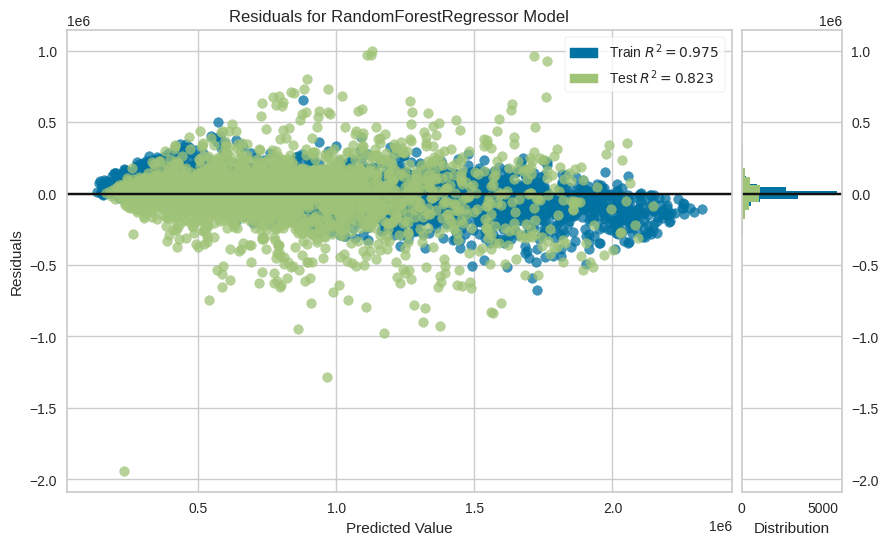

In [ ]:
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(figsize=(10, 6))
rpv = ResidualsPlot(modelo2)
rpv.fit(X_treino2, y_treino2)
rpv.score(X_teste2, y_teste2)
rpv.poof();

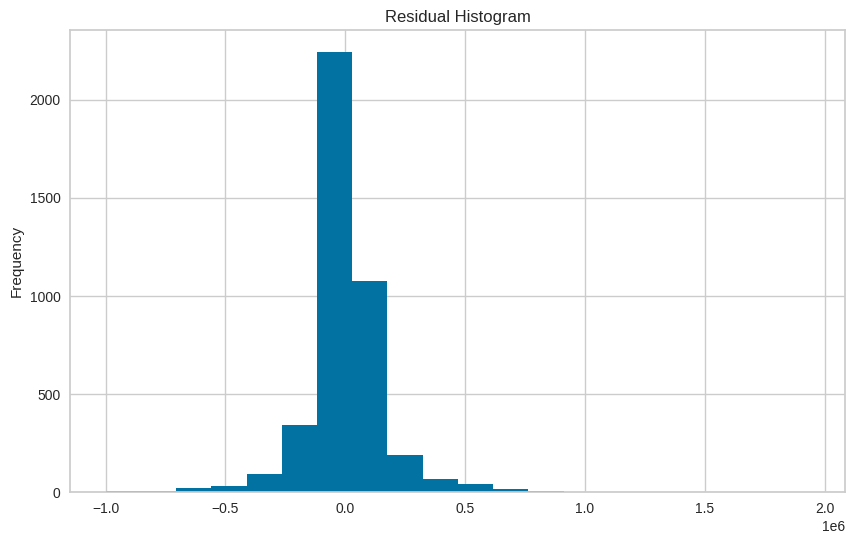

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
resids = y_teste2 - y_pred2
pd.Series(resids, name="residuals").plot.hist(bins=20, ax=ax, title="Residual Histogram");

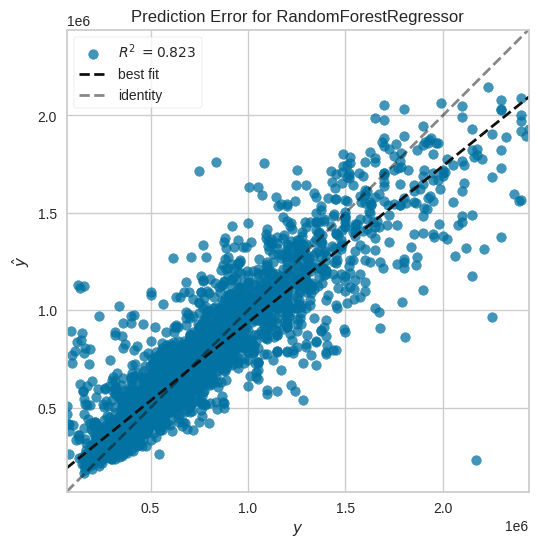

In [ ]:
from yellowbrick.regressor import PredictionError
fig, ax = plt.subplots(figsize=(15, 6))
pev = PredictionError(modelo2)
pev.fit(X_treino2, y_treino2)
pev.score(X_teste2, y_teste2)
pev.poof();

####Cross_Val_Score

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(15, shuffle=True, random_state = 10)
modelo3 = RandomForestRegressor(n_estimators=1000 ,n_jobs=-1,max_depth = 30, random_state=10)
resultado3 = cross_val_score(modelo3,X_treino2, y_treino2, cv = kfold)

In [ ]:
resultado3

array([0.81634426, 0.81542338, 0.8107319 , 0.81453948, 0.83803325,
       0.82726733, 0.80786796, 0.84985384, 0.81253678, 0.78427999,
       0.82144354, 0.83623891, 0.79710788, 0.8144314 , 0.82076439])

In [ ]:
resultado3.mean()*100

81.77909527230594

###XGBOOST

In [ ]:
from pandas.core.common import random_state
from xgboost import XGBRegressor

In [ ]:
modelo4 = XGBRegressor(objective = "reg:squarederror",n_estimators=100, learning_rate=0.07, max_depth=6, subsample=0.80 ,min_child_weight=2, random_state=10 )
resultado4 = modelo4.fit(X_treino2, y_treino2)

In [ ]:
resultado4.score(X_teste2, y_teste2)

0.8216810535894181

In [ ]:
y_pred4 =modelo4.predict(X_teste2)
np.sqrt(mean_squared_error(y_teste2,y_pred4))

161750.6199804128

####Cross_Val_Score

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold=KFold(10, shuffle=True, random_state=10)
modelo8 = XGBRegressor(objective = "reg:squarederror",n_estimators=1100, learning_rate=0.07, max_depth=6, subsample=0.80 ,min_child_weight=2,random_state=10)

In [ ]:
resultado8=cross_val_score(modelo8,X_treino2, y_treino2, cv = kfold )

In [ ]:
resultado8.mean()*100

82.98555573528566

# Selecionado As melhores Features

##SelectKBEST


In [ ]:
from sklearn.feature_selection import SelectKBest
# from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score # são métricas para classificação
from sklearn.feature_selection import f_regression
features_list = ['SUBURB', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA','CBD_DIST', 'NEAREST_STN_DIST', 'LONGITUDE', 'LATITUDE', 'BUILD_YEAR','NEAREST_SCH_RANK']

In [ ]:
k_best_features = SelectKBest(score_func=f_regression, k="all")
k_best_features.fit_transform(X_esc2, y2)
k_best_features.scores = k_best_features.scores_
raw_pairs = zip(features_list[0:], k_best_features.scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

In [ ]:
k_best_features_final =dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print('')
print("Melhores features:")
print(k_best_features_final)


Melhores features:
{'FLOOR_AREA': 9039.142671593481, 'NEAREST_SCH_RANK': 5774.5802118045185, 'CBD_DIST': 3859.5965979668545, 'BATHROOMS': 3642.881786081741, 'BEDROOMS': 1373.877120476723, 'LONGITUDE': 1125.4140395272518, 'BUILD_YEAR': 711.1713314753465, 'NEAREST_STN_DIST': 432.0202010646289, 'GARAGE': 396.45935966657197, 'SUBURB': 70.85830170695809, 'LATITUDE': 60.39014789711191, 'LAND_AREA': 48.581916831512636}


##SelectFdr

In [ ]:
from sklearn.feature_selection import SelectFdr, f_regression

In [ ]:
# alpha: probabilidade de rejeitar a hipotese nula
selecao = SelectFdr(f_regression, alpha=0.00)


In [ ]:
x_novo = selecao.fit_transform( X_esc2, y2)
x_novo.shape, features.values.shape

((20683, 4), (20683, 11))

In [ ]:
# retornando o  valor de p-value de cada coluna
selecao.pvalues_

array([4.08479947e-017, 3.19382050e-291, 0.00000000e+000, 2.14091956e-087,
       3.26309512e-012, 0.00000000e+000, 0.00000000e+000, 5.52198721e-095,
       2.65691255e-240, 8.14188717e-015, 4.46343936e-154, 0.00000000e+000])

In [ ]:
colunas = selecao.get_support()
colunas

array([False, False,  True, False, False,  True,  True, False, False,
       False, False,  True])

In [ ]:
dados.columns

Index(['SUBURB', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'CBD_DIST', 'NEAREST_STN_DIST', 'LONGITUDE', 'LATITUDE', 'BUILD_YEAR',
       'NEAREST_SCH_RANK', 'PRICE'],
      dtype='object')

## SHAP

In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 14.7 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

In [ ]:
model = RandomForestRegressor(random_state=10).fit(X_treino2, y_treino2)

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values( X_teste2)


In [ ]:
X_treino2.shape, X_teste2.shape

((16546, 12), (4137, 12))

In [ ]:
dados.iloc[:, 0:12].columns

Index(['SUBURB', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'CBD_DIST', 'NEAREST_STN_DIST', 'LONGITUDE', 'LATITUDE', 'BUILD_YEAR',
       'NEAREST_SCH_RANK'],
      dtype='object')

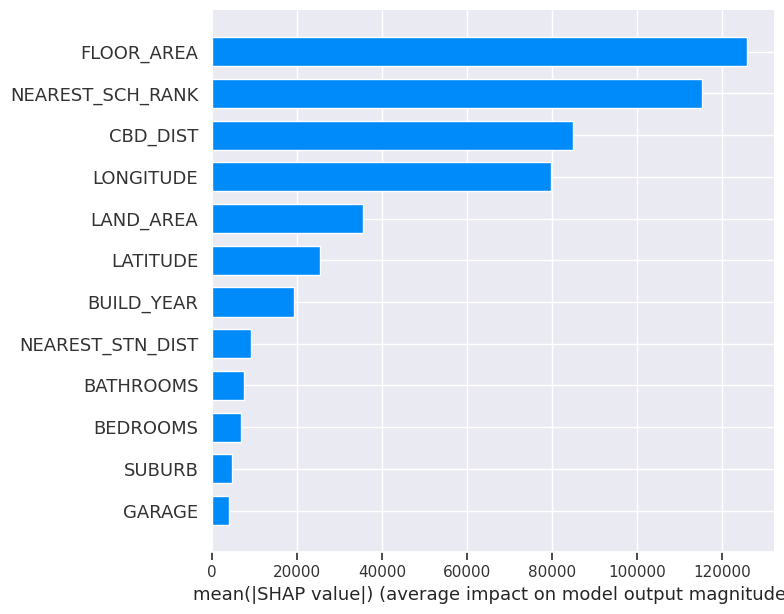

In [ ]:
shap.summary_plot(shap_values,  X_teste2, plot_type="bar", feature_names =['SUBURB', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA','CBD_DIST', 'NEAREST_STN_DIST', 'LONGITUDE', 'LATITUDE', 'BUILD_YEAR','NEAREST_SCH_RANK'])